In [4]:
import numpy as np
import pandas as pd
import os
import sys

In [2]:
os.getcwd()

'/Users/a.ustsov/technopark/disiase_breathing_identification/notebooks'

In [49]:
data_path = '../data/breath_diseases'

In [50]:
demograthic_info = pd.read_csv(os.path.join(data_path, "demographic_info.txt"),
                               delimiter=' ',
                               names=["Patient ID", "Age", "Sex", "Adult BMI (kg/m2)", 
                                      "Child Weight (kg)", "Child Height (cm)"])

In [51]:
demograthic_info

Patient ID    Age  Sex  Adult BMI (kg/m2)  Child Weight (kg)  \
0           101   3.00    F                NaN               19.0   
1           102   0.75    F                NaN                9.8   
2           103  70.00    F              33.00                NaN   
3           104  70.00    F              28.47                NaN   
4           105   7.00    F                NaN               32.0   
..          ...    ...  ...                ...                ...   
121         222  60.00    M                NaN                NaN   
122         223    NaN  NaN                NaN                NaN   
123         224  10.00    F                NaN               32.3   
124         225   0.83    M                NaN                7.8   
125         226   4.00    M                NaN               16.7   

     Child Height (cm)  
0                 99.0  
1                 73.0  
2                  NaN  
3                  NaN  
4                135.0  
..                 ...  
121                NaN  
122                NaN  
123              143.0  
124               74.0  
125              103.0  

[126 rows x 6 columns]

In [52]:
demograthic_info.describe()

Patient ID        Age  Adult BMI (kg/m2)  Child Weight (kg)  \
count  126.000000  125.00000          75.000000          44.000000   
mean   163.500000   42.99264          27.190000          21.361136   
std     36.517119   32.20907           5.372519          17.150885   
min    101.000000    0.25000          16.500000           7.140000   
25%    132.250000    4.00000          24.150000          11.755000   
50%    163.500000   60.00000          27.400000          15.100000   
75%    194.750000   71.00000          29.185000          24.325000   
max    226.000000   93.00000          53.500000          80.000000   

       Child Height (cm)  
count          42.000000  
mean          104.652381  
std            30.793128  
min            64.000000  
25%            81.250000  
50%            99.500000  
75%           117.750000  
max           183.000000

In [53]:
audio_info_path = 'Respiratory_Sound_Database/Respiratory_Sound_Database'

In [62]:
# audiofile_info = pd.read_csv(os.path.join(data_path, audio_info_path, "filename_differences.txt"),
#                             names=["Patient ID", "Record ID", 
#                                    "Chest Location", "Acquisition", 
#                                    "Rec Equip"],
#                             delimiter='_').applymap(lambda x: x.replace("'", ""))

In [63]:
# audiofile_info

In [64]:
# audiofile_info.describe()

In [130]:
patient_diagnosis_info = pd.read_csv(os.path.join(data_path, audio_info_path, "patient_diagnosis.csv"),
                                    names=["Patient ID", "Diagnosis"])

In [131]:
patient_diagnosis_info

Patient ID  Diagnosis
0           101       URTI
1           102    Healthy
2           103     Asthma
3           104       COPD
4           105       URTI
..          ...        ...
121         222       COPD
122         223       COPD
123         224    Healthy
124         225    Healthy
125         226  Pneumonia

[126 rows x 2 columns]

In [59]:
patient_diagnosis_info.describe()

Patient ID
count  126.000000
mean   163.500000
std     36.517119
min    101.000000
25%    132.250000
50%    163.500000
75%    194.750000
max    226.000000

In [60]:
result = pd.merge(demograthic_info, patient_diagnosis_info, on="Patient ID")

In [61]:
result

Patient ID    Age  Sex  Adult BMI (kg/m2)  Child Weight (kg)  \
0           101   3.00    F                NaN               19.0   
1           102   0.75    F                NaN                9.8   
2           103  70.00    F              33.00                NaN   
3           104  70.00    F              28.47                NaN   
4           105   7.00    F                NaN               32.0   
..          ...    ...  ...                ...                ...   
121         222  60.00    M                NaN                NaN   
122         223    NaN  NaN                NaN                NaN   
123         224  10.00    F                NaN               32.3   
124         225   0.83    M                NaN                7.8   
125         226   4.00    M                NaN               16.7   

     Child Height (cm)  Diagnosis  
0                 99.0       URTI  
1                 73.0    Healthy  
2                  NaN     Asthma  
3                  NaN       COPD  
4                135.0       URTI  
..                 ...        ...  
121                NaN       COPD  
122                NaN       COPD  
123              143.0    Healthy  
124               74.0    Healthy  
125              103.0  Pneumonia  

[126 rows x 7 columns]

In [152]:
def parse_audio_and_txt_files(directory):
    audio_file_paths = []
    record_info_file_paths = []
    for dirname, _, filenames in os.walk(directory):
        for filename in filenames:
            full_path = os.path.join(dirname, filename)
            if filename.endswith("wav"):
                audio_file_paths.append(full_path)
    
            elif filename.endswith("txt"):
                record_info_file_paths.append(full_path) 

    return audio_file_paths, record_info_file_paths

directory = os.path.join(data_path, audio_info_path, "audio_and_txt_files")
audio_file_paths, record_info_file_paths = parse_audio_and_txt_files(directory)

assert len(audio_file_paths) == len(record_info_file_paths)
print(len(audio_file_paths))

920


In [153]:
print(record_info_file_paths[0])

../data/breath_diseases/Respiratory_Sound_Database/Respiratory_Sound_Database/audio_and_txt_files/148_1b1_Al_sc_Meditron.txt


In [84]:
print(audio_file_paths[0])

../data/breath_diseases/Respiratory_Sound_Database/Respiratory_Sound_Database/audio_and_txt_files/122_2b1_Tc_mc_LittC2SE.wav


In [155]:
pd.read_csv(recordingInfoFilePaths[0], delimiter='\t', 
            names=["Resp Cycle Begin", "Resp Cycle End", "Crackles", "Weezels"])

Resp Cycle Begin  Resp Cycle End  Crackles  Weezels
0             0.022           3.450         0        0
1             3.450          10.507         0        1
2            10.507          17.336         0        1
3            17.336          19.950         0        0

In [156]:
def parse_filename_info(file):
    return file.split('_')

In [158]:
files_data = []

for file in record_info_file_paths:
    file_basename = os.path.basename(file)
    data = pd.read_csv(file,
                       delimiter='\t',
                       names=['Resp Cycle Begin', 'Resp Cycle End', 'Crackles','Weezels'])

    name_data = parse_filename_info(file_basename)
    data['Patient ID'] = name_data[0]
    data['Record ID'] = name_data[1]
    data['Chest Location'] = name_data[2]
    data['Record Mode'] = name_data[3]
    data['Record Equip'] = name_data[4].rstrip(".txt")
    data['Full Filename'] = file_basename
    files_data.append(data)
    
audiofile_info = pd.concat(files_data)
audiofile_info.reset_index()
audiofile_info.head()

Resp Cycle Begin  Resp Cycle End  Crackles  Weezels Patient ID Record ID  \
0             0.022           0.364         0        0        148       1b1   
1             0.364           2.436         0        0        148       1b1   
2             2.436           4.636         0        0        148       1b1   
3             4.636           6.793         0        0        148       1b1   
4             6.793           8.750         0        0        148       1b1   

  Chest Location Record Mode Record Equip               Full Filename  
0             Al          sc     Meditron  148_1b1_Al_sc_Meditron.txt  
1             Al          sc     Meditron  148_1b1_Al_sc_Meditron.txt  
2             Al          sc     Meditron  148_1b1_Al_sc_Meditron.txt  
3             Al          sc     Meditron  148_1b1_Al_sc_Meditron.txt  
4             Al          sc     Meditron  148_1b1_Al_sc_Meditron.txt

In [159]:
patient_diagnosis_info["Patient ID"] = patient_diagnosis_info["Patient ID"].astype('int32')
audiofile_info["Patient ID"] = audiofile_info["Patient ID"].astype('int32')

In [160]:
full_df = pd.merge(audiofile_info, patient_diagnosis_info, on="Patient ID")

In [183]:
full_df.to_csv("../data", index=False)

IsADirectoryError: [Errno 21] Is a directory: '../data'

In [ ]:
audiofile_info.to_csv("../data")

In [111]:
from sklearn import preprocessing
le = preprocessing.LabelEncoder()

In [120]:
le.fit(patient_diagnosis_info["Diagnosis"].unique())

LabelEncoder()

In [121]:
le.classes_

array(['Asthma', 'Bronchiectasis', 'Bronchiolitis', 'COPD', 'Healthy',
       'LRTI', 'Pneumonia', 'URTI'], dtype=object)

In [123]:
patient_diagnosis_info["Diagnosis"] = le.transform(patient_diagnosis_info["Diagnosis"])

(array([0, 1, 2, 3, 4, 5, 6, 7]),
 [Text(0, 0, 'URTI'),
  Text(1, 0, 'Healthy'),
  Text(2, 0, 'Asthma'),
  Text(3, 0, 'COPD'),
  Text(4, 0, 'LRTI'),
  Text(5, 0, 'Bronchiectasis'),
  Text(6, 0, 'Pneumonia'),
  Text(7, 0, 'Bronchiolitis')])

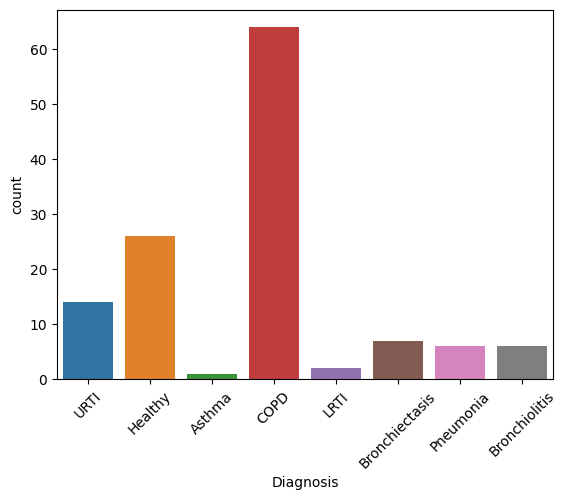

In [162]:
import seaborn as sns
import matplotlib.pyplot as plt

%matplotlib inline

sns.countplot(x=patient_diagnosis_info["Diagnosis"])
plt.xticks(rotation=45)

(array([0, 1, 2, 3, 4, 5, 6, 7]),
 [Text(0, 0, 'URTI'),
  Text(1, 0, 'COPD'),
  Text(2, 0, 'LRTI'),
  Text(3, 0, 'Healthy'),
  Text(4, 0, 'Bronchiolitis'),
  Text(5, 0, 'Pneumonia'),
  Text(6, 0, 'Bronchiectasis'),
  Text(7, 0, 'Asthma')])

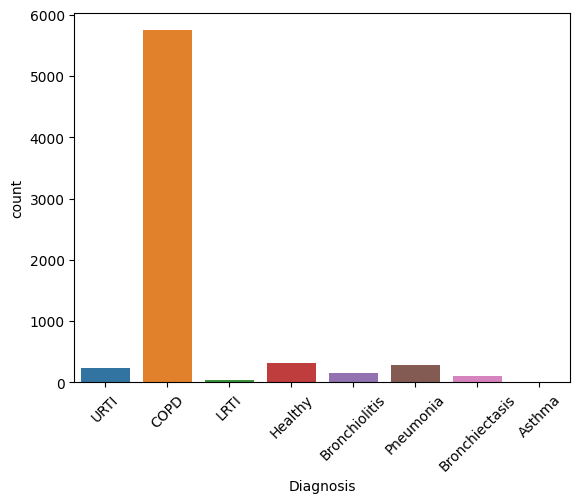

In [163]:
import seaborn as sns
import matplotlib.pyplot as plt

%matplotlib inline

sns.countplot(x=full_df["Diagnosis"])
plt.xticks(rotation=45)

In [164]:
full_df["Diagnosis"].value_counts() / full_df.shape[0] * 100

COPD              83.299507
Healthy            4.668020
Pneumonia          4.131632
URTI               3.522760
Bronchiolitis      2.319513
Bronchiectasis     1.507683
LRTI               0.463903
Asthma             0.086982
Name: Diagnosis, dtype: float64

In [165]:
# !pip install pydub

You should consider upgrading via the '/Users/a.ustsov/technopark/disiase_breathing_identification/venv/bin/python -m pip install --upgrade pip' command.


In [167]:
audiofile_info

Resp Cycle Begin  Resp Cycle End  Crackles  Weezels  Patient ID Record ID  \
0              0.022           0.364         0        0         148       1b1   
1              0.364           2.436         0        0         148       1b1   
2              2.436           4.636         0        0         148       1b1   
3              4.636           6.793         0        0         148       1b1   
4              6.793           8.750         0        0         148       1b1   
..               ...             ...       ...      ...         ...       ...   
8             16.946          19.156         1        0         130       2b3   
0              0.022           3.450         0        0         116       1b2   
1              3.450          10.507         0        1         116       1b2   
2             10.507          17.336         0        1         116       1b2   
3             17.336          19.950         0        0         116       1b2   

   Chest Location Record Mode Record Equip               Full Filename  
0              Al          sc     Meditron  148_1b1_Al_sc_Meditron.txt  
1              Al          sc     Meditron  148_1b1_Al_sc_Meditron.txt  
2              Al          sc     Meditron  148_1b1_Al_sc_Meditron.txt  
3              Al          sc     Meditron  148_1b1_Al_sc_Meditron.txt  
4              Al          sc     Meditron  148_1b1_Al_sc_Meditron.txt  
..            ...         ...          ...                         ...  
8              Al          mc     AKGC417L  130_2b3_Al_mc_AKGC417L.txt  
0              Pl          sc     Meditron  116_1b2_Pl_sc_Meditron.txt  
1              Pl          sc     Meditron  116_1b2_Pl_sc_Meditron.txt  
2              Pl          sc     Meditron  116_1b2_Pl_sc_Meditron.txt  
3              Pl          sc     Meditron  116_1b2_Pl_sc_Meditron.txt  

[6898 rows x 10 columns]

In [168]:
# Play an audio file

from pydub import AudioSegment
import IPython

# We will listen to this file:
# 213_1p5_Pr_mc_AKGC417L.wav

IPython.display.Audio(audio_file_paths[0])

In [170]:
import librosa

gSampleRate = 7000

def loadFiles(fileList):
    outputBuffers = []
    for filename in fileList:
        audioBuffer, nativeSampleRate = librosa.load(filename, dtype=np.float32, mono=True, sr=None)
        if nativeSampleRate == gSampleRate:
            outputBuffers.append(audioBuffer)
        else:
        #Linear resampling using numpy is significantly faster than Librosa's default technique
            duration = len(audioBuffer) / nativeSampleRate
            nTargetSamples = int(duration * gSampleRate)
            timeXSource = np.linspace(0, duration, len(audioBuffer), dtype=np.float32)
            timeX = np.linspace(0, duration, nTargetSamples, dtype=np.float32)
            resampledBuffer = np.interp(timeX, timeXSource, audioBuffer)
            outputBuffers.append(resampledBuffer)
            
    return outputBuffers

In [171]:
audioBuffers = loadFiles(audio_file_paths)

In [173]:
from scipy import signal
import matplotlib.pyplot as plt

upperCutoffFreq = 3000
cutoffFrequencies = [80, upperCutoffFreq]

#FIR coefficients for a bandpass filter with a window of 80-3000 Hz
highPassCoeffs = signal.firwin(401, cutoffFrequencies, fs=gSampleRate, pass_zero="bandpass")

def applyHighpass(npArr):
    return signal.lfilter(highPassCoeffs, [1.0], npArr)

#Higher gamma results in more aggressive compression
def applyLogCompressor(signal, gamma):
    sign = np.sign(signal)
    absSignal = 1 + np.abs(signal) * gamma
    logged = np.log(absSignal)
    scaled = logged * (1 / np.log(1.0 + gamma)) #Divide by the maximum possible value from compression
    return sign * scaled

#Scales all samples to ensure the peak signal is 1/-1
def normalizeVolume(npArr):
    minAmp, maxAmp = (np.amin(npArr), np.amax(npArr))
    maxEnv = max(abs(minAmp), abs(maxAmp))
    scale = 1.0 / maxEnv
    #in place multiply
    npArr *= scale
    return npArr

#Removing the low-freq noise, re-normalizing volume then apply compressor
noiseRemoved = [normalizeVolume(applyHighpass(buffer)) for buffer in audioBuffers]
noiseRemoved = [applyLogCompressor(sig, 30) for sig in noiseRemoved]

In [ ]:
selectedSampleIdx = 0

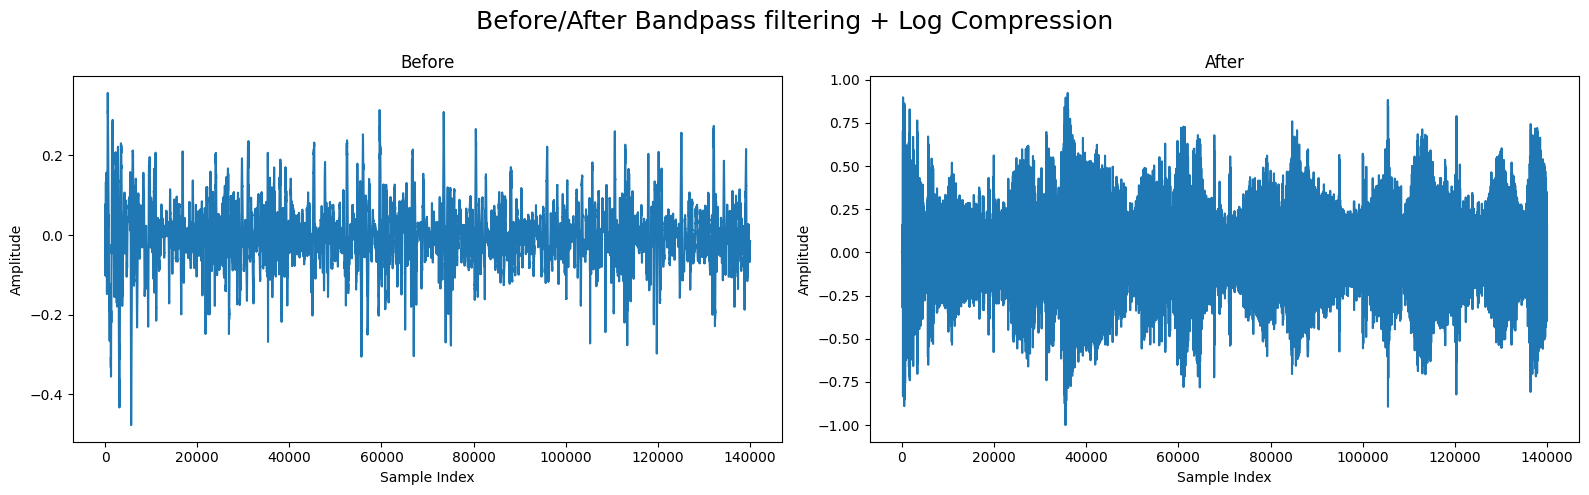

Before Filtering


Post Filtering


In [175]:
import IPython.display as ipd

fig, axs = plt.subplots(1,2, figsize=(16,5))

fig.suptitle('Before/After Bandpass filtering + Log Compression', fontsize=18)

axs[0].plot(audioBuffers[selectedSampleIdx])
axs[0].set_title("Before")

axs[1].plot(noiseRemoved[selectedSampleIdx])
axs[1].set_title("After")

for ax in axs.flat:
    ax.set(ylabel='Amplitude', xlabel='Sample Index')    

plt.tight_layout() 
plt.show()

print("Before Filtering")
ipd.display(ipd.Audio(audioBuffers[selectedSampleIdx], rate=gSampleRate))
print("Post Filtering")
ipd.display(ipd.Audio(noiseRemoved[selectedSampleIdx], rate=gSampleRate))

In [178]:
windowSizeSeconds = 0.05 
windowSampleSize = int(gSampleRate * windowSizeSeconds)

def plotSpectrogram(specData):
    plt.figure(figsize=(16,5))
    #Gamma scaling factor of 0.1 needed to make spectrogram more readable
    plt.pcolormesh(specData[1], specData[0], np.power(specData[2],0.1) , shading='gouraud')
    plt.ylim(0, upperCutoffFreq)
    plt.ylabel('Frequency [Hz]')
    plt.xlabel('Time [sec]')
    plt.show()
    
#(audioBuffers:float[][]) => (frequencies:float[], time(seconds):float[], amplitudes:float[][]))[]
def getSpectrograms(audioBuffers):
    spectrograms = []
    for buffer in audioBuffers:
        freqTable, times, powerSpectrum = signal.spectrogram(buffer, gSampleRate, nperseg=windowSampleSize)
        spectrograms.append((freqTable, times, powerSpectrum))
    return spectrograms

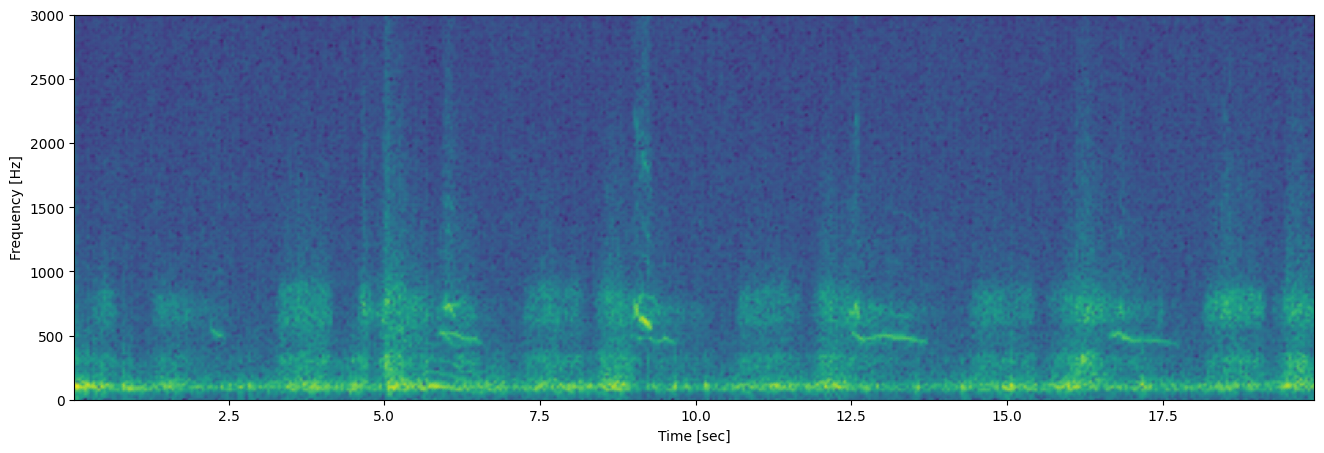

In [179]:
spectrograms = getSpectrograms(noiseRemoved)
plotSpectrogram(spectrograms[selectedSampleIdx])

In [180]:
def getPowerEnvelop(spectrogram, cutoff, plot=False):
    frequencies = spectrogram[0]
    timeSlices = spectrogram[1]
    spectrum = spectrogram[2]
    
    maxInd = np.sum(frequencies <= cutoff)
    truncFreq = frequencies[:maxInd]
    
    powerEnvelop = []
    for idx, _ in enumerate(timeSlices):
        freqAmplitudes = spectrum[:maxInd,idx]
        
        powerBins = freqAmplitudes * np.square(truncFreq)
        powerEnvelop.append(sum(powerBins))
    if (plot): 
        plt.figure(figsize=(16,5))
        plt.title("Intensity vs time")
        plt.plot(timeSlices, powerEnvelop)
        plt.xlabel("Time(s)")
        plt.ylabel("Power")
        plt.show()
        
    return (timeSlices, powerEnvelop)

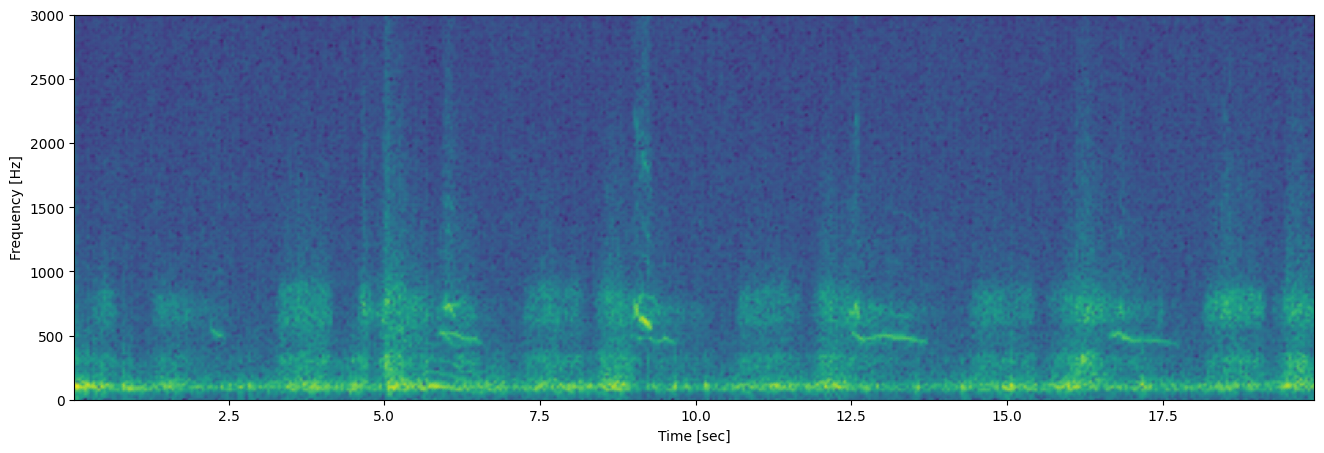

In [182]:
plotSpectrogram(spectrograms[selectedSampleIdx])

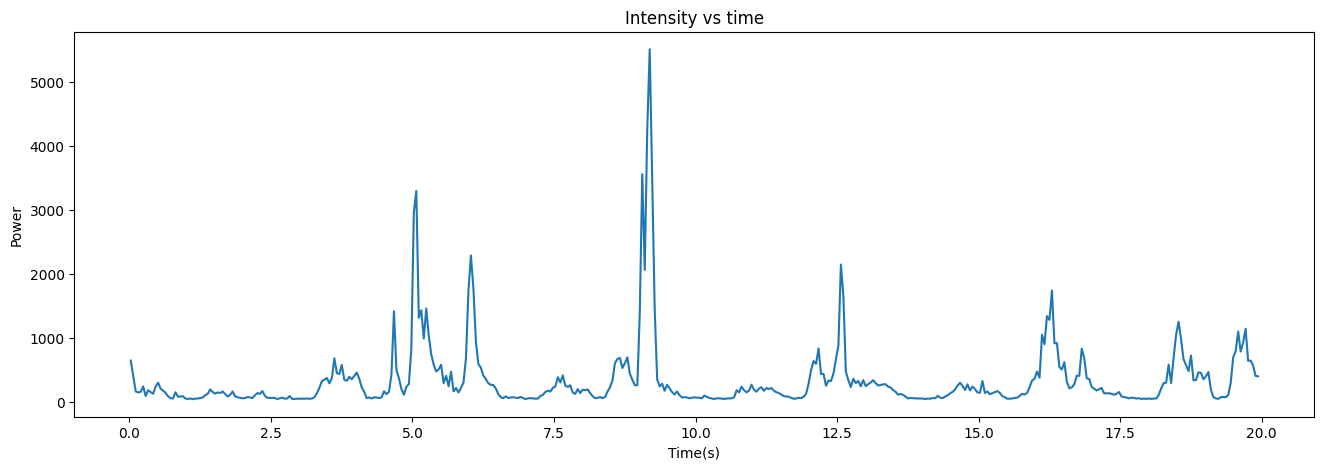

In [181]:
time, amp = getPowerEnvelop(spectrograms[selectedSampleIdx], upperCutoffFreq, True)